<a href="https://colab.research.google.com/github/abhisheksharma712/employee-turnover-/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
df.shape

(2290, 6)

In [8]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [15]:
df1=df.drop('Date',axis=1)

In [24]:
cor=df1.corr()

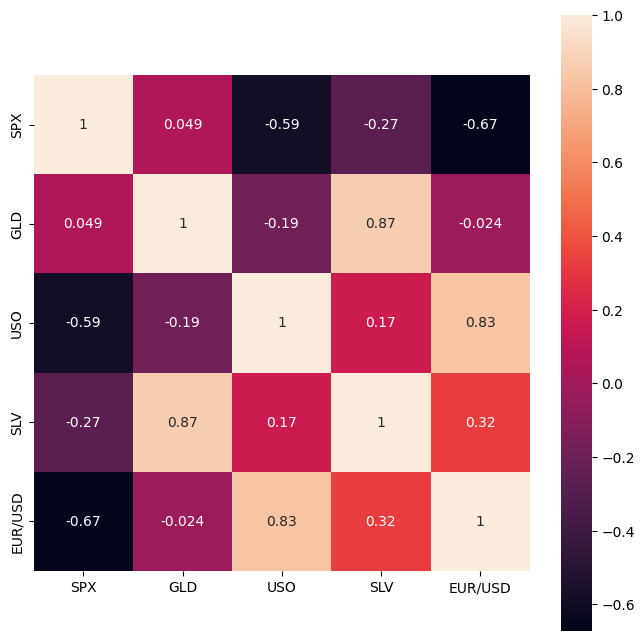

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(),cbar=True,square=True,annot=True)
plt.show()

In [25]:
cor['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<ipython-input-26-a6befb54552d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

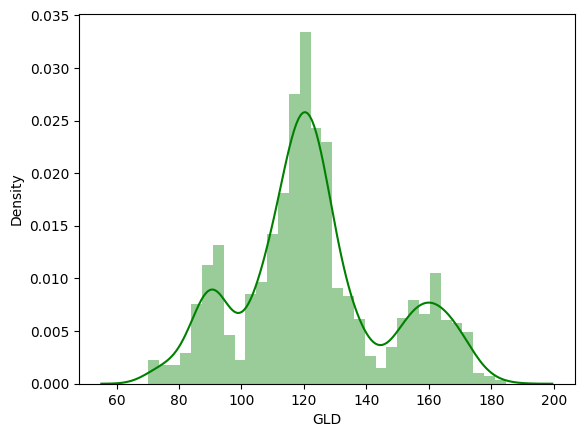

In [26]:
 sns.distplot(df['GLD'],color='green')

In [27]:
x=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
regressor=RandomForestRegressor(n_estimators=100)


In [31]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
test_data_pred=regressor.predict(x_test)
print(test_data_pred)

[168.00049932  81.96909977 116.05370006 127.62540097 120.87280115
 154.88059782 150.39279853 126.25770055 117.51369894 126.014401
 116.54520103 172.01310118 141.59859835 168.04169859 115.21430015
 117.50100021 138.05240278 169.75550009 158.94230341 158.30520005
 155.19470023 124.93580002 176.73329903 157.07940371 125.2522007
  93.62449945  77.37470024 120.42470013 119.0540989  167.41289962
  88.21490068 125.12439998  91.01640053 117.72810045 121.08309919
 136.85310045 115.53880105 115.68220063 148.22369998 106.94950081
 104.50660268  87.14819787 126.39090029 117.73970027 152.94389881
 119.67720032 108.29250012 108.17659836  93.16740047 126.94769847
  75.18190057 113.57579908 121.30690029 111.41939893 118.79089901
 120.31339965 158.74250056 165.47940154 147.00579679  85.88039849
  94.5277002   86.71799847  90.56650038 118.9674009  126.43030073
 127.44579992 169.26899976 122.25829933 117.60659906  98.71050029
 168.59290089 143.2241982  132.16400228 121.13060214 121.06049931
 119.64060055

In [33]:
error_score=metrics.r2_score(y_test,test_data_pred)
print('R squared error :',error_score)

R squared error : 0.989127351488918


In [34]:
y_test=list(y_test)

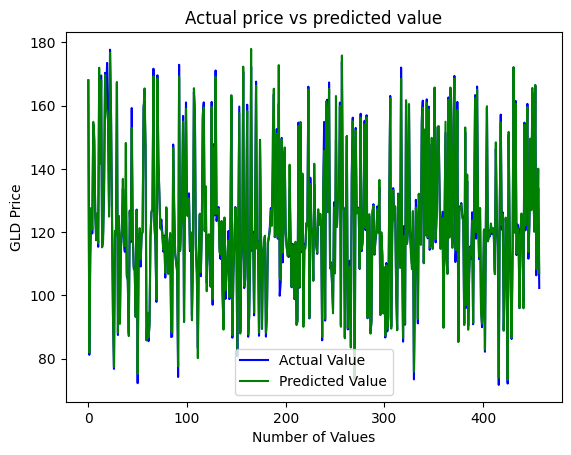

In [35]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_pred,color='green',label='Predicted Value')
plt.title('Actual price vs predicted value')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()